In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

In [25]:
data_folder = r'C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Noveno Semestre\PA-RSPPs\PA-Experiments\output'

def load_csvs_with_substring(directory, substring):
    dataframes = []
    filenames = []

    for file in os.listdir(directory):
        if file.endswith(".csv") and substring in file:
            full_path = os.path.join(directory, file)
            df = pd.read_csv(full_path)
            dataframes.append(df)
            filenames.append(file)

    return dataframes, filenames

time_sarp, _ = load_csvs_with_substring(data_folder, 'time_sarp')
CS_time_vanilla = pd.read_csv(os.path.join(data_folder, 'CS_time_vanilla.csv'))
length_sarp, _ = load_csvs_with_substring(data_folder, 'length_sarp')
pruned_sarp, _ = load_csvs_with_substring(data_folder, 'prune_sarp')
time_sdrspp, _ = load_csvs_with_substring(data_folder, 'time_sdrsp')
nondominated_sdrspp, _ = load_csvs_with_substring(data_folder, 'nondominated_sdrsp')
regression = pd.read_csv(os.path.join(data_folder, 'regression.csv'))

# index change
time_sarp[0], time_sarp[1] = time_sarp[1], time_sarp[0]
length_sarp[0], length_sarp[1] = length_sarp[1], length_sarp[0]
pruned_sarp[0], pruned_sarp[1] = pruned_sarp[1], pruned_sarp[0]

In [26]:
pastel_green = "#79b385"  # Darker shade of pastel green
pastel_blue = "#6a9db5"   # Darker shade of pastel blue
pastel_orange = "#d6a65b"  # Darker shade of pastel orange

#### SARP

Mean:  6.94e-03---- 2.13e-01---- 4.87e-01----
Median:  5.70e-03---- 2.04e-01---- 4.69e-01----
Std:  1.25e-02---- 4.10e-02---- 7.08e-02----


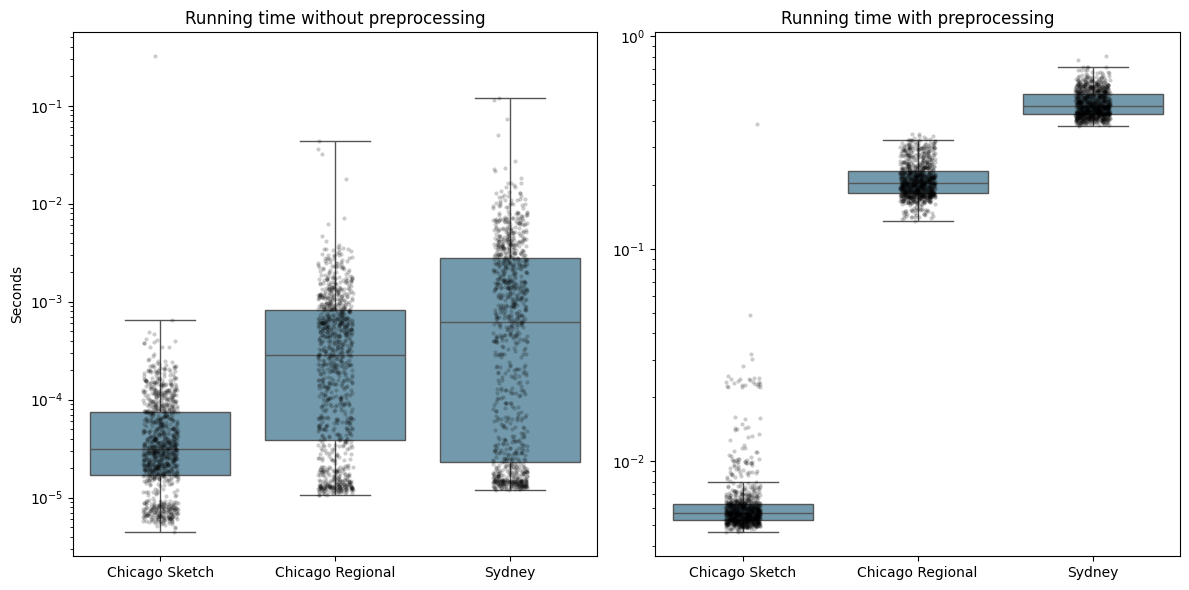

In [27]:
# Extract values
CS_raw = time_sarp[0]["CS_t"].values
CR_raw = time_sarp[1]["CR_t"].values
SY_raw = time_sarp[2]["SY_t"].values


CS_prep = time_sarp[0]["CS_t_prep"].values + CS_raw
CR_prep = time_sarp[1]["CR_t_prep"].values + CR_raw
SY_prep = time_sarp[2]["SY_t_prep"].values + SY_raw
print("Mean: ", 
      f"{CS_prep.mean():.2e}----", 
      f"{CR_prep.mean():.2e}----", 
      f"{SY_prep.mean():.2e}----")
print("Median: ",
      f"{np.median(CS_prep):.2e}----", 
      f"{np.median(CR_prep):.2e}----", 
      f"{np.median(SY_prep):.2e}----")
print("Std: ",
        f"{CS_prep.std():.2e}----", 
        f"{CR_prep.std():.2e}----", 
        f"{SY_prep.std():.2e}----")

# Create DataFrames
df_raw = pd.DataFrame({
    "Time": list(CS_raw) + list(CR_raw) + list(SY_raw),
    "Network": ["Chicago Sketch"] * len(CS_raw) + ["Chicago Regional"] * len(CR_raw) + ["Sydney"] * len(SY_raw)
})

df_prep = pd.DataFrame({
    "Time": list(CS_prep) + list(CR_prep) + list(SY_prep),
    "Network": ["Chicago Sketch"] * len(CS_prep) + ["Chicago Regional"] * len(CR_prep) + ["Sydney"] * len(SY_prep)
})

# Subplots with independent y-axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # No sharey

# Raw times plot
sns.boxplot(data=df_raw, x="Network", y="Time", log_scale=True,
            showfliers=False, color=pastel_blue, ax=axes[0])
sns.stripplot(data=df_raw, x="Network", y="Time", color='black',
              alpha=0.2, size=3, jitter=True, log_scale=True, ax=axes[0])
axes[0].set_title("Running time without preprocessing")
axes[0].set_ylabel("Seconds", fontsize=10)

# Prepended times plot
sns.boxplot(data=df_prep, x="Network", y="Time", log_scale=True,
            showfliers=False, color=pastel_blue, ax=axes[1])
sns.stripplot(data=df_prep, x="Network", y="Time", color='black',
              alpha=0.2, size=3, jitter=True, log_scale=True, ax=axes[1])
axes[1].set_title("Running time with preprocessing")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[0].set_xlabel("")

plt.tight_layout()
plt.show()


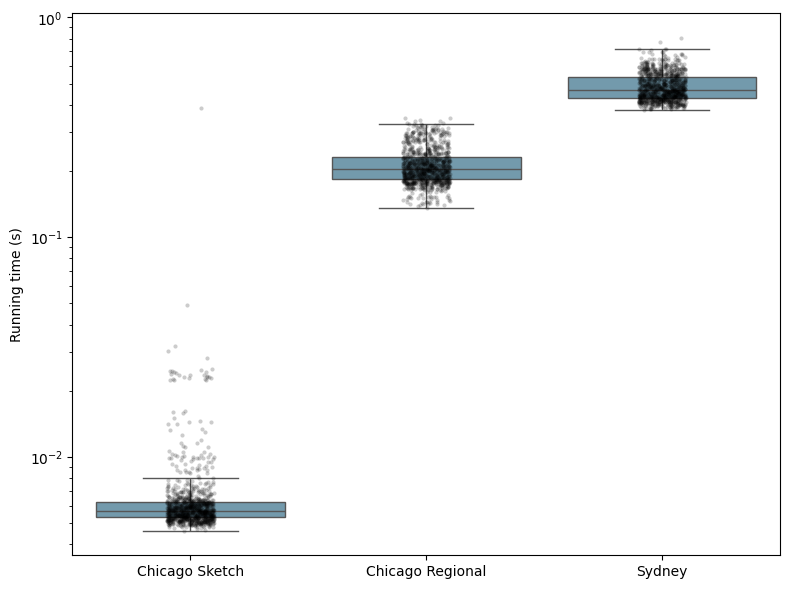

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Adjusted figsize for single plot

# Prepended times plot on the single axis
sns.boxplot(data=df_prep, x="Network", y="Time", log_scale=True,
            showfliers=False, color=pastel_blue, ax=ax)
sns.stripplot(data=df_prep, x="Network", y="Time", color='black',
              alpha=0.2, size=3, jitter=True, log_scale=True, ax=ax)

# Set title and labels for the single plot
ax.set_ylabel("Running time (s)", fontsize=10)
ax.set_xlabel("", fontsize=10)

plt.tight_layout()
plt.show()

In [29]:
CS_time_vanilla["total"] = CS_time_vanilla["CS_t"] + CS_time_vanilla["CS_t_prep"]
CS_time_vanilla.describe()

,CS_t,CS_t_prep,total
count,100.000000,100.000000,100.000000
mean,0.002835,0.007001,0.009837
std,0.022630,0.007460,0.028983
min,0.000006,0.004137,0.004155
25%,0.000024,0.005138,0.005243
50%,0.000085,0.005527,0.005708
75%,0.000203,0.006135,0.006300
max,0.221919,0.067471,0.289390


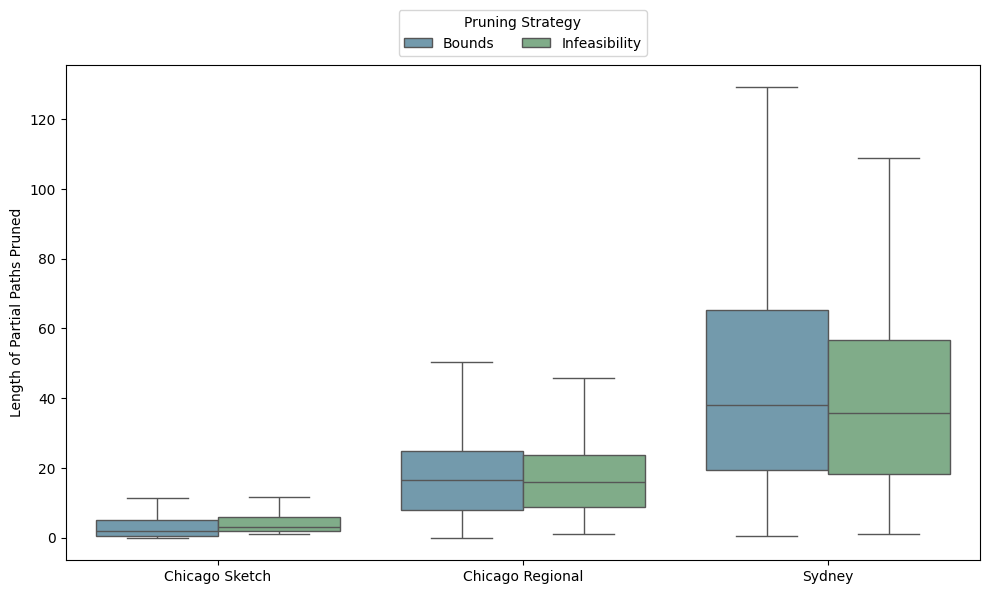

Mean Length of Pulse Pruned for Each Prune by Network:
            Network          Prune     Number
0  Chicago Regional         Bounds  17.221643
1  Chicago Regional  Infeasibility  17.287001
2    Chicago Sketch         Bounds   3.223618
3    Chicago Sketch  Infeasibility   4.138345
4            Sydney         Bounds  43.321152
5            Sydney  Infeasibility  40.068975


In [30]:
melted_data_list = [
    pd.melt(df, var_name="Network", value_name="Number")
    for df in length_sarp
]
melted_data = pd.concat(melted_data_list, ignore_index=True)
melted_data.dropna(inplace=True)

melted_data["Prune"] = melted_data["Network"].apply(lambda x: "Bounds" if "b" in x else "Infeasibility")
# Step 4: Normalize network names for plotting
melted_data["Network"] = melted_data["Network"].replace({
    "CS_b": "Chicago Sketch",
    "CS_i": "Chicago Sketch",
    "CR_b": "Chicago Regional",
    "CR_i": "Chicago Regional",
    "SY_b": "Sydney",
    "SY_i": "Sydney"
})

# Step 5: Plot
fig, ax = plt.subplots(figsize=(10, 6))

boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="Number",
    hue="Prune",
    palette=[pastel_blue, pastel_green],
    showfliers=False,
    ax=ax,
)

ax.legend(title="Pruning Strategy", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.125))

ax.set_xlabel('')
boxplot.set_ylabel("Length of Partial Paths Pruned", fontsize=10)

plt.tight_layout()
plt.show()

# Step 6: Print means
mean_values = melted_data.groupby(["Network", "Prune"])["Number"].mean().reset_index()
print("Mean Length of Pulse Pruned for Each Prune by Network:")
print(mean_values)

In [31]:
print(f"Chicago Sketch. Bounds: {pruned_sarp[0]['CS_b'].mean()}, Infeasibility: {pruned_sarp[0]['CS_i'].mean()}")
print(f"Chicago Regional. Bounds: {pruned_sarp[1]['CR_b'].mean()}, Infeasibility: {pruned_sarp[1]['CR_i'].mean()}")
print(f"Sydney. Bounds: {pruned_sarp[2]['SY_b'].mean()}, Infeasibility: {pruned_sarp[2]['SY_i'].mean()}")


Chicago Sketch. Bounds: 5.928, Infeasibility: 13.574
Chicago Regional. Bounds: 27.253, Infeasibility: 31.508
Sydney. Bounds: 63.3420260782347, Infeasibility: 30.045135406218655


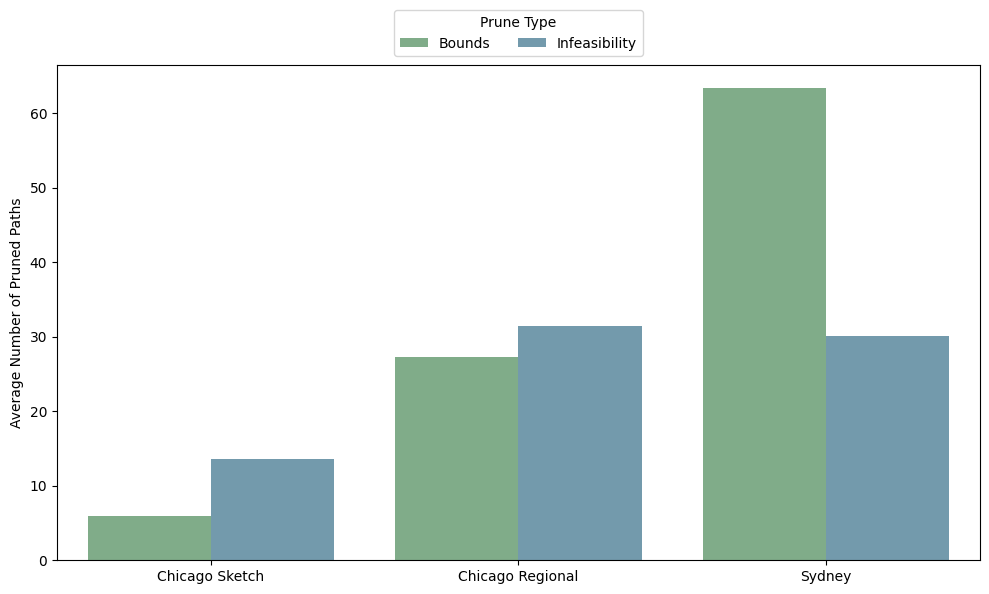

In [32]:
data = {
    'Network': ['Chicago Sketch', 'Chicago Sketch', 'Chicago Regional', 'Chicago Regional', 'Sydney', 'Sydney'],
    'Metric': ['Bounds', 'Infeasibility', 'Bounds', 'Infeasibility', 'Bounds', 'Infeasibility'],
    'Value': [
        pruned_sarp[0]['CS_b'].mean(),
        pruned_sarp[0]['CS_i'].mean(),
        pruned_sarp[1]['CR_b'].mean(),
        pruned_sarp[1]['CR_i'].mean(),
        pruned_sarp[2]['SY_b'].mean(),
        pruned_sarp[2]['SY_i'].mean()
    ]
}

df = pd.DataFrame(data)

color_palette = {
    'Bounds': pastel_green,
    'Infeasibility': pastel_blue
}

plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(x='Network', y='Value', hue='Metric', data=df, palette=color_palette)
plt.ylabel('Average Number of Pruned Paths', fontsize=10)
plt.xlabel('', fontsize=10)
plt.legend(title='Prune Type', loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.125))
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [33]:
CS_bounds_percent = (pruned_sarp[0]["CS_b"] / (pruned_sarp[0]["CS_b"] + pruned_sarp[0]["CS_i"])).mean() * 100
CS_inf_percent = (pruned_sarp[0]["CS_i"] / (pruned_sarp[0]["CS_b"] + pruned_sarp[0]["CS_i"])).mean() * 100

CR_bounds_percent = (pruned_sarp[1]["CR_b"] / (pruned_sarp[1]["CR_b"] + pruned_sarp[1]["CR_i"])).mean() * 100
CR_inf_percent = (pruned_sarp[1]["CR_i"] / (pruned_sarp[1]["CR_b"] + pruned_sarp[1]["CR_i"])).mean() * 100

SY_bounds_percent = (pruned_sarp[2]["SY_b"] / (pruned_sarp[2]["SY_b"] + pruned_sarp[2]["SY_i"])).mean() * 100
SY_inf_percent = (pruned_sarp[2]["SY_i"] / (pruned_sarp[2]["SY_b"] + pruned_sarp[2]["SY_i"])).mean() * 100

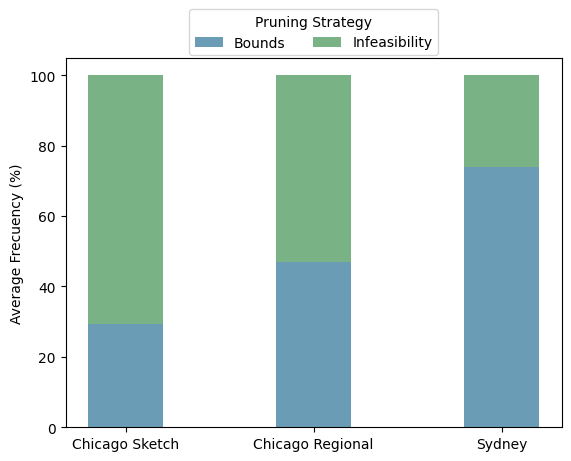

Chicago Sketch
Bounds:  29.34163417095288
Infeasibility:  70.65836582904711
Chicago Regional
Bounds:  47.01956962178198
Infeasibility:  52.98043037821801
Sydney
Bounds:  73.98727982066727
Infeasibility:  26.01272017933274


In [34]:
fig, ax = plt.subplots()

sns.barplot()

bar_width = 0.4

ax.bar("Chicago Sketch", CS_bounds_percent, label="Bounds", color=pastel_blue, width=bar_width)
ax.bar("Chicago Sketch", CS_inf_percent, bottom=CS_bounds_percent, label="Infeasibility", color=pastel_green, width=bar_width)

ax.bar("Chicago Regional", CR_bounds_percent, color=pastel_blue, width=bar_width)
ax.bar("Chicago Regional", CR_inf_percent, bottom=CR_bounds_percent, color=pastel_green, width=bar_width)

ax.bar("Sydney", SY_bounds_percent, color=pastel_blue, width=bar_width)
ax.bar("Sydney", SY_inf_percent, bottom=SY_bounds_percent, color=pastel_green, width=bar_width)

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Use a dictionary to keep unique labels
ax.legend(unique_labels.values(), unique_labels.keys(), title="Pruning Strategy", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))

plt.ylabel("Average Frecuency (%)")
plt.show()

#Print the values for each bar graph
print("Chicago Sketch")
print("Bounds: ", CS_bounds_percent)
print("Infeasibility: ", CS_inf_percent)
print("Chicago Regional")
print("Bounds: ", CR_bounds_percent)
print("Infeasibility: ", CR_inf_percent)
print("Sydney")
print("Bounds: ", SY_bounds_percent)
print("Infeasibility: ", SY_inf_percent)


#### SDRSPP

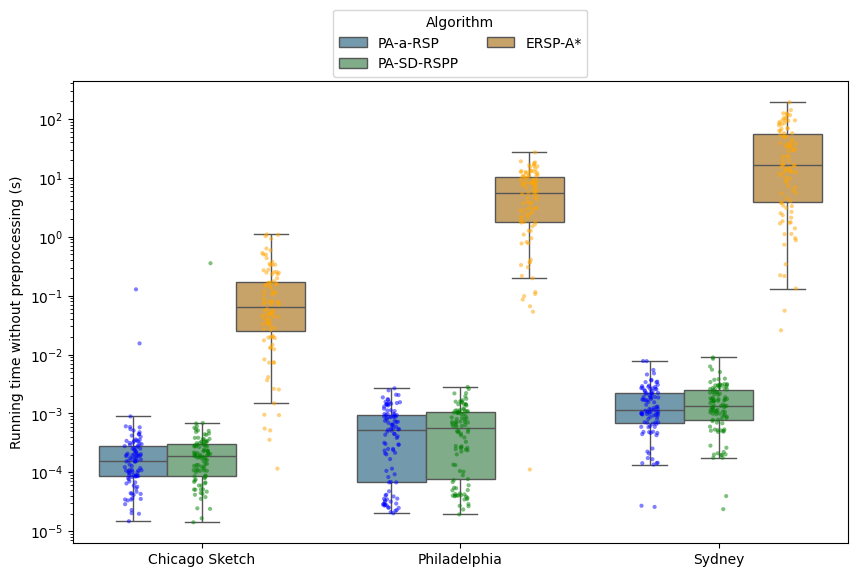

Mean Running Time for Each Algorithm by Network:
          Network   Algorithm      Time
0  Chicago Sketch     ERSP-A*  1.55e-01
1  Chicago Sketch  PA-SD-RSPP  3.76e-03
2  Chicago Sketch    PA-a-RSP  1.62e-03
3    Philadelphia     ERSP-A*  6.51e+00
4    Philadelphia  PA-SD-RSPP  6.71e-04
5    Philadelphia    PA-a-RSP  6.42e-04
6          Sydney     ERSP-A*  3.54e+01
7          Sydney  PA-SD-RSPP  1.78e-03
8          Sydney    PA-a-RSP  1.64e-03


In [35]:
# remove certain columns of the list
time_sdrspp_noprep = [df.drop(columns=[col for col in df.columns if 'pt' in col]) for df in time_sdrspp]

melted_data_list = [
    pd.melt(df, var_name="Network", value_name="Time")
    for df in time_sdrspp_noprep
]
melted_data = pd.concat(melted_data_list, ignore_index=True)
melted_data.dropna(inplace=True)

melted_data["Algorithm"] = melted_data["Network"].apply(
    lambda x: "ERSP-A*" if "ERSPA" in x else ("PA-SD-RSPP" if "dominance" in x else "PA-a-RSP")
)
melted_data["Network"] = melted_data["Network"].replace({
    "CS_t": "Chicago Sketch",
    "CS_t_ERSPA": "Chicago Sketch",
    "CS_t_dominance": "Chicago Sketch",
    "PH_t": "Philadelphia",
    "PH_t_ERSPA": "Philadelphia",
    "PH_t_dominance": "Philadelphia",
    "SY_t": "Sydney",
    "SY_t_ERSPA": "Sydney", 
    "SY_t_dominance": "Sydney",
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=[pastel_blue, pastel_green, pastel_orange],
    showfliers=False,
    ax=ax,
    log_scale=True)

# Adding strip plot for individual data points
sns.stripplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=["blue", "green", "orange"],
    dodge=True,
    alpha=0.5,
    size=3,
    jitter=True,
    log_scale=True,
    ax=ax,
    legend=False
)

ax.legend(title="Algorithm", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.17))
ax.set_xlabel('')
boxplot.set_ylabel("Running time without preprocessing (s)", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Algorithm"])["Time"].mean().reset_index()
mean_values["Time"] = mean_values["Time"].apply(lambda x: "{:.2e}".format(x))
print("Mean Running Time for Each Algorithm by Network:")
print(mean_values)

In [36]:
for df in time_sdrspp:
    pt_cols = [col for col in df.columns if '_pt' in col]
    df = df[pt_cols]
    print(df.describe())

            CS_pt  CS_pt_dominance  CS_pt_ERSPA
count  100.000000       100.000000   100.000000
mean     0.004418         0.004361     0.000010
std      0.002295         0.003470     0.000002
min      0.002913         0.002906     0.000009
25%      0.003559         0.003202     0.000009
50%      0.003947         0.003585     0.000010
75%      0.004513         0.003987     0.000011
max      0.020027         0.024679     0.000019
            PH_pt  PH_pt_dominance  PH_pt_ERSPA
count  100.000000       100.000000   100.000000
mean     0.098783         0.104160     0.000187
std      0.010790         0.033521     0.000042
min      0.091623         0.091975     0.000149
25%      0.094894         0.096010     0.000173
50%      0.096348         0.097254     0.000179
75%      0.098130         0.100020     0.000186
max      0.185078         0.391430     0.000524
           SY_pt  SY_pt_dominance  SY_pt_ERSPA
count  99.000000        99.000000    99.000000
mean    0.228441         0.237510     0.00

In [37]:
time_sdrspp_summed = []

for df in time_sdrspp:
    pt_cols = [col for col in df.columns if '_pt' in col]
    t_cols = [col for col in df.columns if '_t' in col]

    # Normalize to base names (strip _pt or _t)
    pt_keys = {col.replace('_pt', ''): col for col in pt_cols}
    t_keys = {col.replace('_t', ''): col for col in t_cols}

    # Find common base names
    common_keys = set(pt_keys).intersection(t_keys)

    # Create new DataFrame with only the summed columns
    new_df = pd.DataFrame()
    for key in common_keys:
        new_df[key] = df[pt_keys[key]] + df[t_keys[key]]
    
    time_sdrspp_summed.append(new_df)

In [50]:
for i, df in enumerate(time_sdrspp_summed):
    print(df.describe())

         CS_ERSPA  CS_dominance          CS
count  100.000000    100.000000  100.000000
mean     0.154739      0.008120    0.006041
std      0.227617      0.035663    0.013556
min      0.000125      0.002939    0.003133
25%      0.024979      0.003412    0.003773
50%      0.064536      0.003725    0.004157
75%      0.170071      0.004285    0.004682
max      1.093091      0.359514    0.137718
       PH_dominance    PH_ERSPA          PH
count    100.000000  100.000000  100.000000
mean       0.104831    6.513192    0.099425
std        0.033474    5.547657    0.010789
min        0.093140    0.000290    0.091903
25%        0.096636    1.787362    0.095398
50%        0.098220    5.462826    0.097146
75%        0.100837   10.270028    0.098578
max        0.391909   27.034898    0.185246
       SY_dominance    SY_ERSPA         SY
count     99.000000   99.000000  99.000000
mean       0.239294   35.365829   0.230086
std        0.073361   40.093664   0.024927
min        0.207065    0.026133   0.

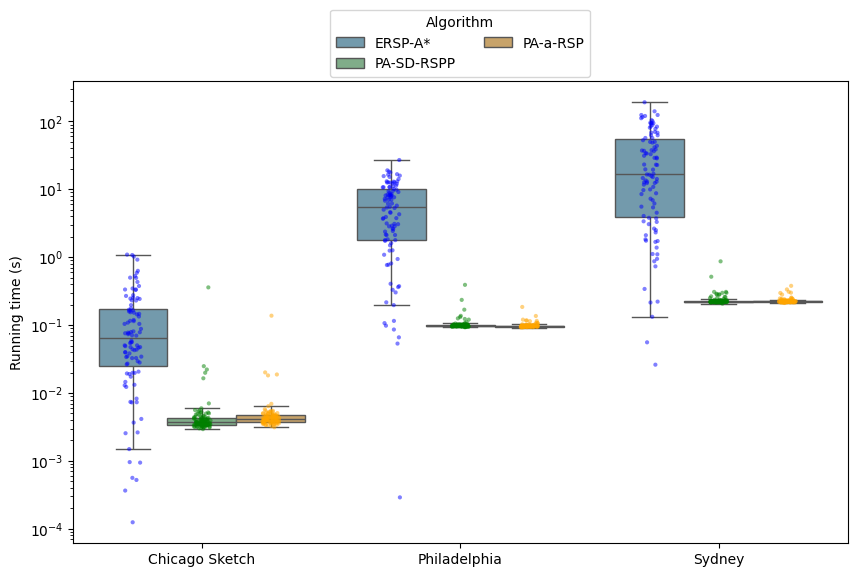

Mean Running Time for Each Algorithm by Network:
          Network   Algorithm      Time
0  Chicago Sketch     ERSP-A*  1.55e-01
1  Chicago Sketch  PA-SD-RSPP  8.12e-03
2  Chicago Sketch    PA-a-RSP  6.04e-03
3    Philadelphia     ERSP-A*  6.51e+00
4    Philadelphia  PA-SD-RSPP  1.05e-01
5    Philadelphia    PA-a-RSP  9.94e-02
6          Sydney     ERSP-A*  3.54e+01
7          Sydney  PA-SD-RSPP  2.39e-01
8          Sydney    PA-a-RSP  2.30e-01


In [38]:
melted_data_list = [
    pd.melt(df, var_name="Network", value_name="Time")
    for df in time_sdrspp_summed
]

melted_data = pd.concat(melted_data_list, ignore_index=True)
melted_data.dropna(inplace=True)

melted_data["Algorithm"] = melted_data["Network"].apply(
    lambda x: "ERSP-A*" if "ERSPA" in x else ("PA-SD-RSPP" if "dominance" in x else "PA-a-RSP")
)
melted_data["Network"] = melted_data["Network"].replace({
    "CS": "Chicago Sketch",
    "CS_ERSPA": "Chicago Sketch",
    "CS_dominance": "Chicago Sketch",
    "PH": "Philadelphia",
    "PH_ERSPA": "Philadelphia",
    "PH_dominance": "Philadelphia",
    "SY": "Sydney",
    "SY_ERSPA": "Sydney", 
    "SY_dominance": "Sydney",
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=[pastel_blue, pastel_green, pastel_orange],
    showfliers=False,
    ax=ax,
    log_scale=True
)

# Adding strip plot for individual data points
sns.stripplot(
    data=melted_data,
    x="Network",
    y="Time",
    hue="Algorithm",
    palette=["blue", "green", "orange"],
    dodge=True,
    alpha=0.5,
    size=3,
    jitter=True,
    log_scale=True,
    ax=ax,
    legend=False
)

ax.legend(title="Algorithm", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.17))
ax.set_xlabel('')
boxplot.set_ylabel("Running time (s)", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Algorithm"])["Time"].mean().reset_index()
mean_values["Time"] = mean_values["Time"].apply(lambda x: "{:.2e}".format(x))
print("Mean Running Time for Each Algorithm by Network:")
print(mean_values)

In [39]:
print(nondominated_sdrspp[0].mean())
print(nondominated_sdrspp[1].mean())
print(nondominated_sdrspp[2].mean())

CS_n                0.58
CS_n_dominance      0.58
CS_n_ERSPA        467.89
dtype: float64
PH_n                0.45
PH_n_dominance      0.45
PH_n_ERSPA        887.16
dtype: float64
SY_n                0.676768
SY_n_dominance      0.676768
SY_n_ERSPA        767.565657
dtype: float64


c:\Users\esteb\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\esteb\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


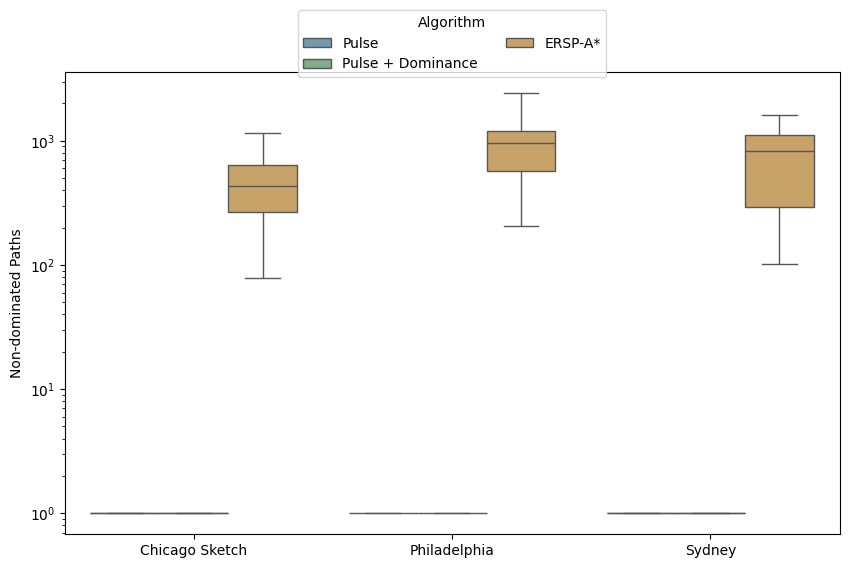

Mean Non-Dominated Paths for Each Algorithm by Network:
          Network          Algorithm NonDominatedPaths
0  Chicago Sketch            ERSP-A*          4.68e+02
1  Chicago Sketch              Pulse          5.80e-01
2  Chicago Sketch  Pulse + Dominance          5.80e-01
3    Philadelphia            ERSP-A*          8.87e+02
4    Philadelphia              Pulse          4.50e-01
5    Philadelphia  Pulse + Dominance          4.50e-01
6          Sydney            ERSP-A*          7.68e+02
7          Sydney              Pulse          6.77e-01
8          Sydney  Pulse + Dominance          6.77e-01


In [40]:
melted_data_list = [
    pd.melt(df, var_name="Network", value_name="NonDominatedPaths")
    for df in nondominated_sdrspp
]

melted_data = pd.concat(melted_data_list, ignore_index=True)

melted_data["Algorithm"] = melted_data["Network"].apply(
    lambda x: "ERSP-A*" if "ERSPA" in x else ("Pulse + Dominance" if "dominance" in x else "Pulse")
)
melted_data["Network"] = melted_data["Network"].replace({
    "CS_n": "Chicago Sketch",
    "CS_n_dominance": "Chicago Sketch",
    "CS_n_ERSPA": "Chicago Sketch",
    "PH_n": "Philadelphia",
    "PH_n_dominance": "Philadelphia",
    "PH_n_ERSPA": "Philadelphia",
    "SY_n": "Sydney",
    "SY_n_dominance": "Sydney",
    "SY_n_ERSPA": "Sydney"
})

fig, ax = plt.subplots(figsize=(10, 6))


boxplot = sns.boxplot(
    data=melted_data,
    x="Network",
    y="NonDominatedPaths",
    hue="Algorithm",
    palette=[pastel_blue, pastel_green, pastel_orange],
    showfliers=False,
    ax=ax,
    log_scale=True
)



ax.legend(title="Algorithm", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.15))

ax.set_xlabel('')
boxplot.set_ylabel("Non-dominated Paths", fontsize=10)
plt.show()

mean_values = melted_data.groupby(["Network", "Algorithm"])["NonDominatedPaths"].mean().reset_index()
mean_values["NonDominatedPaths"] = mean_values["NonDominatedPaths"].apply(lambda x: "{:.2e}".format(x))
print("Mean Non-Dominated Paths for Each Algorithm by Network:")
print(mean_values)

#### REGRESSION

In [41]:
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan

len(regression)

22980

In [ ]:
df = regression.copy()
nodes = {
    'SY': 75379,
    'CS': 2950,
    'CR': 39018
}
# these are arcs

for network in nodes.keys():
    df.loc[df['Network'] == network, 'Nodes'] = nodes[network]

df_CS = df[df['Network'] == 'CS']
df_CR = df[df['Network'] == 'CR']
df_SY = df[df['Network'] == 'SY']
df_CS = df_CS.drop(columns=['Network'])
df_CR = df_CR.drop(columns=['Network'])
df_SY = df_SY.drop(columns=['Network'])

dfs = [df_CS, df_CR, df_SY]

for i, df in enumerate(dfs):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for i, df in enumerate(dfs):
    for col in df.columns:
        df[col + '_log'] = np.log(df[col])

df_all = pd.concat(dfs, ignore_index=True)

                            OLS Regression Results                            
Dep. Variable:       Elapsed_Time_log   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     956.0
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        19:01:22   Log-Likelihood:                -45641.
No. Observations:               22980   AIC:                         9.129e+04
Df Residuals:                   22974   BIC:                         9.134e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.9638      0.052   -229.402

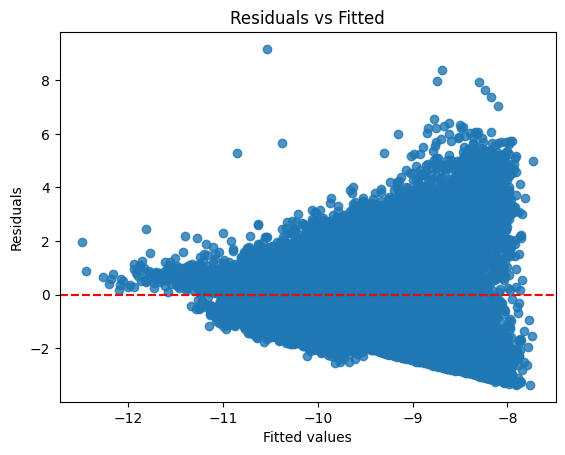

(np.float64(5839.974512779276), np.float64(0.0), np.float64(1565.5469655704287), np.float64(0.0))


In [83]:
# Matriz de diseño
X = df_all[['Gamma_log', 'Alpha_log',
       'Rho_log', 'Max_Depth_log', 'Distance_log']]
X = sm.add_constant(X)  # Agrega beta_0 (intercepto)
y = df_all['Elapsed_Time_log']

# Regresión lineal
model = sm.OLS(y, X).fit()
print(model.summary())

residuals = model.resid
fitted_vals = model.fittedvalues

# Plot residuals vs fitted values
sns.residplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

bp_test = het_breuschpagan(residuals, X)
print(bp_test)

In [84]:
ols_resid = model.resid
weights = 1 / (ols_resid ** 2 + 1e-6) 

model_wls = sm.WLS(y, X, weights=weights).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:       Elapsed_Time_log   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.944e+06
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        19:01:24   Log-Likelihood:                -32652.
No. Observations:               22980   AIC:                         6.532e+04
Df Residuals:                   22974   BIC:                         6.537e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.9631      0.001  -1.14e+04

                            OLS Regression Results                            
Dep. Variable:       Elapsed_Time_log   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     1680.
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        19:01:31   Log-Likelihood:                -45535.
No. Observations:               22980   AIC:                         9.108e+04
Df Residuals:                   22976   BIC:                         9.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.3016      0.062   -182.206   

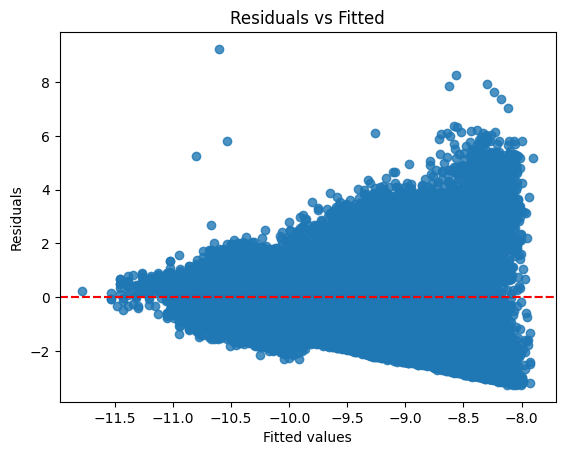

(np.float64(6103.948838214051), np.float64(0.0), np.float64(2770.085789270707), np.float64(0.0))


In [85]:
X_red = df_all[['Alpha_log', 'Distance_log', 'Nodes']]
X_red = sm.add_constant(X_red)  # Agrega beta_0 (intercepto)

model_red = sm.OLS(y, X_red).fit()
print(model_red.summary())

residuals = model_red.resid
fitted_vals = model_red.fittedvalues

# Plot residuals vs fitted values
sns.residplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

bp_test = het_breuschpagan(residuals, X_red)
print(bp_test)


In [86]:
ols_resid_red = model_red.resid
weights = 1 / (ols_resid_red ** 2 + 1e-6) 

model_wls_red = sm.WLS(y, X_red, weights=weights).fit()
print(model_wls_red.summary())

                            WLS Regression Results                            
Dep. Variable:       Elapsed_Time_log   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.062e+06
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        19:01:33   Log-Likelihood:                -31378.
No. Observations:               22980   AIC:                         6.276e+04
Df Residuals:                   22976   BIC:                         6.280e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.3007      0.001  -1.04e+04   

In [87]:
print("Intercept: ", f"{np.exp(model_wls_red.params.iloc[0]):.2e}")

Intercept:  1.24e-05
